# Problema de decaimiento exponencial
Consideramos el problema de decaimiento exponencial (ecuación de prueba)
$$
u'(t) = -a\,u(t), \qquad a > 0,\qquad u(0)=u_0,\qquad t\in[0,T].
$$
La solución exacta es
$$
u(t) = u_0 e^{-a t}.
$$



## Malla temporal
Definimos una malla temporal uniforme con paso $\Delta t > 0$:
$$
t_n = t_0 + n\Delta t,\qquad n=0,1,\dots,N,\qquad N = \frac{T-t_0}{\Delta t}.
$$
En la práctica, si $\Delta t$ no divide exactamente $T-t_0$, se tomará
$N = \mathrm{round}\!\big((T-t_0)/\Delta t\big)$ y se usará el paso efectivo
$\Delta t_{\mathrm{eff}} = (T-t_0)/N$.

**Denotaremos** $u^n = u(t_n)$.


### Forward Euler (explícito)
Derivado de la aproximación hacia adelante en el tiempo:
$$
\frac{u^{n+1}-u^n}{\Delta t} = -a u^n
\quad\Longrightarrow\quad
u^{n+1} = (1 - a \Delta t)\,u^n
$$


### Backward Euler (implícito)
Derivado de la aproximación hacia atrás en el tiempo:
$$
\frac{u^{n+1}-u^n}{\Delta t} = -a u^{n+1}
\quad\Longrightarrow\quad
u^{n+1} = \frac{1}{1+a \Delta t}\,u^n
$$

### Crank–Nicolson (trapezoidal)
Promedia las pendientes en $t_n$ y $t_{n+1}$:
$$
\frac{u^{n+1}-u^n}{\Delta t} = -\frac{a}{2}(u^n + u^{n+1})
\quad\Longrightarrow\quad
u^{n+1} = \frac{1-\tfrac{a \Delta t}{2}}{1+\tfrac{a \Delta t}{2}}\,u^n,
$$

### Norma de error 
Sea la solución numérica $u^n$ y la "target" $u_{\text{target}}^n = u(t_n)$. Definimos
$$
\varepsilon^n = u^n - u_{\text{target}}^n,
\qquad
E \;=\; \sqrt{\frac{1}{N}\sum_{n=0}^{N-1} (\varepsilon^n)^2 }.
$$
(Usamos la suma hasta $N-1$ para seguir la forma propuesta en el enunciado. Alternativamente se puede promediar sobre $n=0,\dots,N$.)


## Criterios de "crecimiento" y "oscilación"

Algunas veces el método de Euler no funciona, en particular, esto sucede cuando
- **Hay crecimiento o hay oscilación**. Esto sucede cuando existe $n$ tal que $u^{n+1} > u^n $ o cuando $u^{n+1} \cdot u^n<0$ respectivamente.

Para el problema de decaimiento exponencial visto en clase, proponer y realizar experimentos virtuales que verifiquen las tres afirmaciones que se hacen al final de la sección 2.2 del libro Finite difference computing with Exponential Decay Problem de los recursos del curso. 

1. El método de Euler hacia adelante es un esquema **condicionalmente estable** porque requiere $\Delta t < 2/a$ para evitar soluciones crecientes y $\Delta t < 1/a$ para evitar soluciones oscilatorias.  

2. El método de Crank–Nicolson es **incondicionalmente estable** con respecto a soluciones crecientes, mientras que es condicionalmente estable con el criterio $\Delta t < 2/a$ para evitar soluciones oscilatorias.  

3. El método de Euler hacia atrás es **incondicionalmente estable** con respecto a soluciones crecientes y oscilatorias — cualquier $\Delta t$ funcionará. 

Teniendolas en cuenta, encuentre zonas de linealidad entre el logaritmo del error y el logaritmo del paso de tiempo para los 3 esquemas y estime la pendiente de dicha relación para cada caso. 

$$
\log(E)  = p \log{\Delta t}
$$

Discuta sobre estos valores frente a los órdenes de las aproximaciones. 

Comenzamos con la primera afirmación.



Primero, veamos el comportamiento de cuatro casos para el método explicito de Euler, con $a = 5$, $u_0 = 2$, $t_0 = 0$, $t_f = 10$.

1. $t = 0.1$, Donde $\Delta t < 1/a$ y $\Delta t < 2/a$ 
2. $t = 0.3$, Donde $\Delta t > 1/a$ y $\Delta t < 2/a$ 
3. $t = 0.5$, Donde $\Delta t > 1/a$ y $\Delta t > 2/a$ 

In [1]:
from numericalMethods import exponentialDecay, finiteDifferences
import numpy as np
from utilities import plot_function

In [4]:
u0 = 2
a = 5
t_0 = 0
t_f = 10
n = 30

t_arr = np.linspace(t_0, t_f, n)

case1 = exponentialDecay.forward_euler(u0, a, 0.1, n - 1)
case2 = exponentialDecay.forward_euler(u0, a, 0.3, n - 1)
case3 = exponentialDecay.forward_euler(u0, a, 0.5, n - 1)


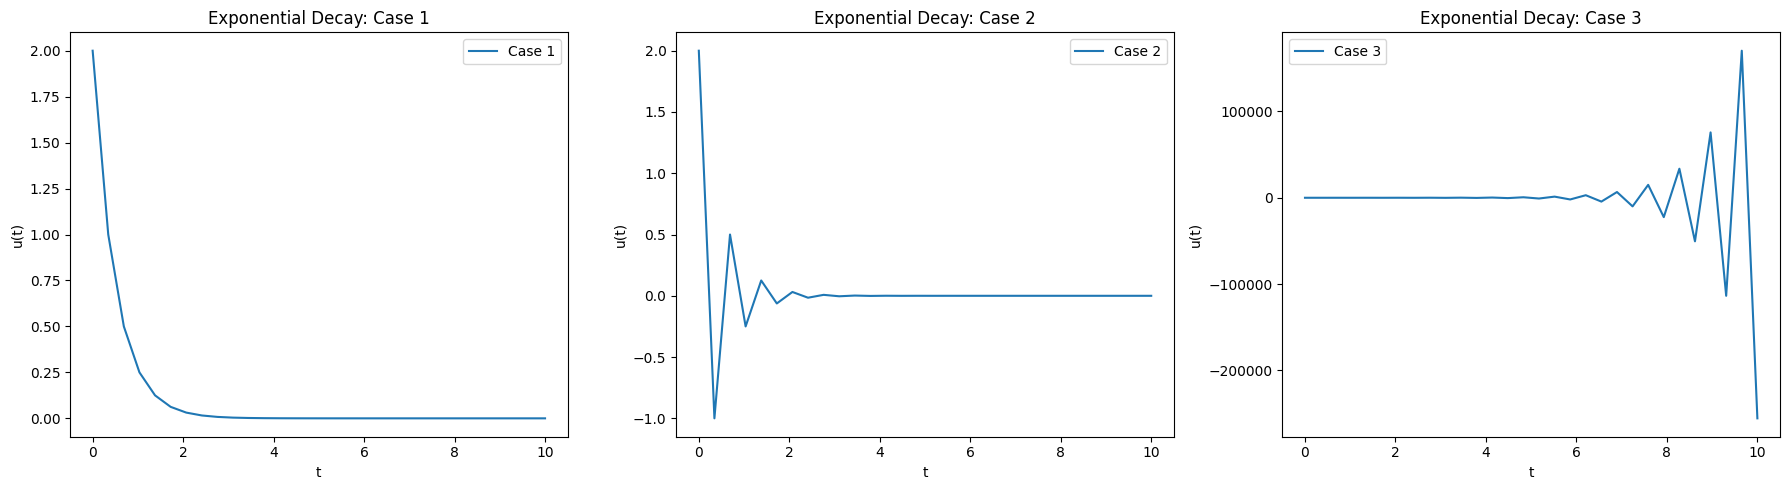

In [5]:
plot_function({"Case 1": [t_arr, case1],
                "Case 2": [t_arr, case2],
                "Case 3": [t_arr, case3]}, same_plot= False)

Vemos entonces que el caso 1 es capaz de aproximar bien el decaimiento exponencial. El caso 2 oscila sobre la solución y el caso 3 crece.